In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

!wget https://usresp2023.gd.edu.kg/dataset/h5n1_cdc_clean.csv
# Load the dataset
df = pd.read_csv("/content/h5n1_cdc_clean.csv")

# Selecting features
selected_features = ['avg.temp', 'cases']

# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train_data, test_data = df.iloc[0:train_size, :], df.iloc[train_size:len(df), :]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data[selected_features])
test_data = scaler.transform(test_data[selected_features])

# Converting data into sequences
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train, y_train = create_sequences(train_data, train_data[:, 1], time_steps)
X_test, y_test = create_sequences(test_data, test_data[:, 1], time_steps)

# Building and compiling the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Evaluating the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

--2023-04-28 02:54:05--  https://usresp2023.gd.edu.kg/dataset/h5n1_cdc_clean.csv
Resolving usresp2023.gd.edu.kg (usresp2023.gd.edu.kg)... 104.21.86.246, 172.67.138.99, 2606:4700:3031::ac43:8a63, ...
Connecting to usresp2023.gd.edu.kg (usresp2023.gd.edu.kg)|104.21.86.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15473454 (15M) [text/csv]
Saving to: ‘h5n1_cdc_clean.csv.1’

h5n1_cdc_clean.csv. 100%[===================>]  14.76M  83.2MB/s    in 0.2s    

2023-04-28 02:54:08 (83.2 MB/s) - ‘h5n1_cdc_clean.csv.1’ saved [15473454/15473454]

Epoch 1/50
2096/2096 - 11s - loss: 0.0062 - accuracy: 0.9841 - val_loss: 3.8901e-04 - val_accuracy: 0.9889 - 11s/epoch - 5ms/step
Epoch 2/50
2096/2096 - 9s - loss: 6.7692e-04 - accuracy: 0.9851 - val_loss: 3.8834e-04 - val_accuracy: 0.9889 - 9s/epoch - 4ms/step
Epoch 3/50
2096/2096 - 9s - loss: 6.7952e-04 - accuracy: 0.9851 - val_loss: 3.8809e-04 - val_accuracy: 0.9889 - 9s/epoch - 4ms/step
Epoch 4/50
2096/2096 - 9s - loss: 6

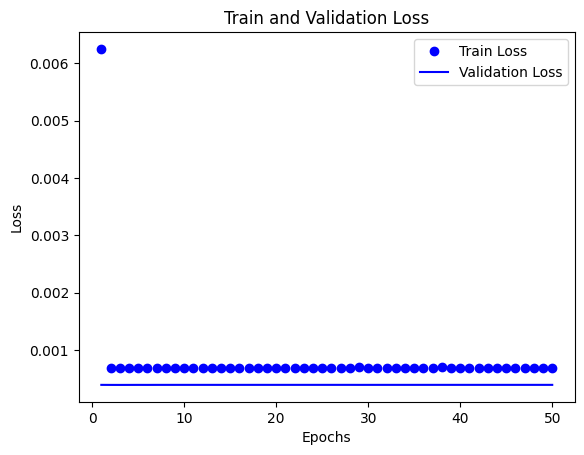

In [4]:
import matplotlib.pyplot as plt

# Define the epochs and loss values
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the train loss and validation loss
plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
